In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import gaussian_kde
import matplotlib.patches as pc

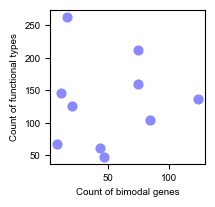

In [3]:
dir1='bimodal genes'
dir2='genes normalization'
filelist1=['Spanish', 'Danish', 'American', 'Pig', 'Mouse', 'Marine', 'Human_nose', 'Human_forehead', 'Human_cheek','3_countries_combined']
Quantities_of_Bimodal_genes =[]
Quantities_of_functional_type =[]
for k in range(len(filelist1)):
    df1=pd.read_csv(dir1+'/'+filelist1[k]+'_BiDgenes',sep='\t')
    df2=pd.read_csv(dir2+'/'+filelist1[k],sep='\t',index_col=0)
    df2T=df2.T
    ko_name = df1.iloc[:,0].to_list()
    boundary_valley = []
    for i in range(len(ko_name)):
            y=df2T[ko_name[i]]
            if np.sum(abs(np.log(y[y>0]))>0)>0.3*len(df2T): 
                data = np.log(y[y>0]) 
                kde = gaussian_kde(data) 
                kde_data = kde.evaluate(np.linspace(min(data), max(data), 1000)) 
                kde_x=np.linspace(min(data), max(data), 1000) 
                kde_y=kde(kde_x) 
                dy_dx = np.gradient(kde_y, kde_x) 
                peakposi_y=[] 
                valeyposi_y=[] 
                peakposi_x=[] 
                valeyposi_x=[] 
                for j in range(len(dy_dx)):
                    if dy_dx[j-1]>=0 and dy_dx[j]<=0 :  
                        peak_y=kde_y[j-1]
                        peakposi_y.append(peak_y)
                        peak_x=kde_x[j-1]
                        peakposi_x.append(peak_x)
                    if dy_dx[j-1]<=0 and dy_dx[j]>=0:
                        valey_y=kde_y[j]
                        valeyposi_y.append(valey_y)
                        valey_x=kde_x[j]
                        valeyposi_x.append(valey_x)
                if len(peakposi_y)>=2: 
                    Ymax1=max(peakposi_y) 
                    BB=[]
                    for a in peakposi_y: 
                        BB.append(a)
                    BB.remove(max(BB))
                    Ymax2=max(BB) 
                    Xmax1=peakposi_x[peakposi_y.index(Ymax1)] 
                    Xmax2=peakposi_x[peakposi_y.index(Ymax2)] 
                    Yvaley=[] 
                    for b in valeyposi_x:
                        if Xmax1<b<=Xmax2 or Xmax2<b<=Xmax1:
                            CC=valeyposi_y[valeyposi_x.index(b)]
                            Yvaley.append(CC)
                    x=np.exp(valeyposi_x[(valeyposi_y.index(min(Yvaley)))])
                    boundary_valley.append(x)
    if len(ko_name)==len(boundary_valley):
        maxtrix=np.full((len(df2T),len(ko_name)),2, dtype=object) 
        for i in range(len(boundary_valley)):
            for j in range(len(df2T)):
                math1=df2T[ko_name[i]].tolist()[j]
                math2=boundary_valley[i]
                if math1<math2 :
                    maxtrix[j,i]=0
                if math1==0:
                    maxtrix[j,i]=None
                elif math1>=math2:
                    maxtrix[j,i]=1
    else: print(False)
    #Combine the 0s and 1s in the matrix row by row into a binary number，and convert the binary number to a decimal number.
    c=[]
    for i in range(len(maxtrix)):
        a = maxtrix[i,:]
        a = [0 if x is None else x for x in a]
        a = [str(i) for i in a] # Convert each element to a string
        b = int(''.join(a),2) # Convert binary string to decimal integer
        c.append(b)
    sorted_id = sorted(range(len(c)), key=lambda k: c[k], reverse=False)
    
    # Calculate the number of non-repetitive elements in c
    unique_count = len(set(c))
    x=len(ko_name)
    y=unique_count
    Quantities_of_Bimodal_genes.append(x)
    Quantities_of_functional_type.append(y)
plt.figure(figsize=(2, 2))
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 7
plt.rcParams['pdf.fonttype'] = 42
plt.scatter(Quantities_of_Bimodal_genes, Quantities_of_functional_type, s=40,color='#8A8AFF')  
plt.xlabel('Count of bimodal genes')  
plt.ylabel('Count of functional types')  
plt.savefig('fig/Count of bimodal genes & Count of functional types.pdf',bbox_inches='tight')
data_to_save = pd.DataFrame({
    'Count of bimodal genes': Quantities_of_Bimodal_genes,
    'Count of functional types': Quantities_of_functional_type
}, index=filelist1)
data_to_save.to_excel('fig/Count of bimodal genes & Count of functional types.xlsx', index=True)
